20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\badico\AppData\Local\Temp\ipykernel_6264\3812819889.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  future['UFE'] = data['UFE'].ffill().iloc[-1]
C:\Users\badico\AppData\Local\Temp\ipykernel_6264\3812819889.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  future['Doviz'] = data['Doviz'].ffill().iloc[-1]


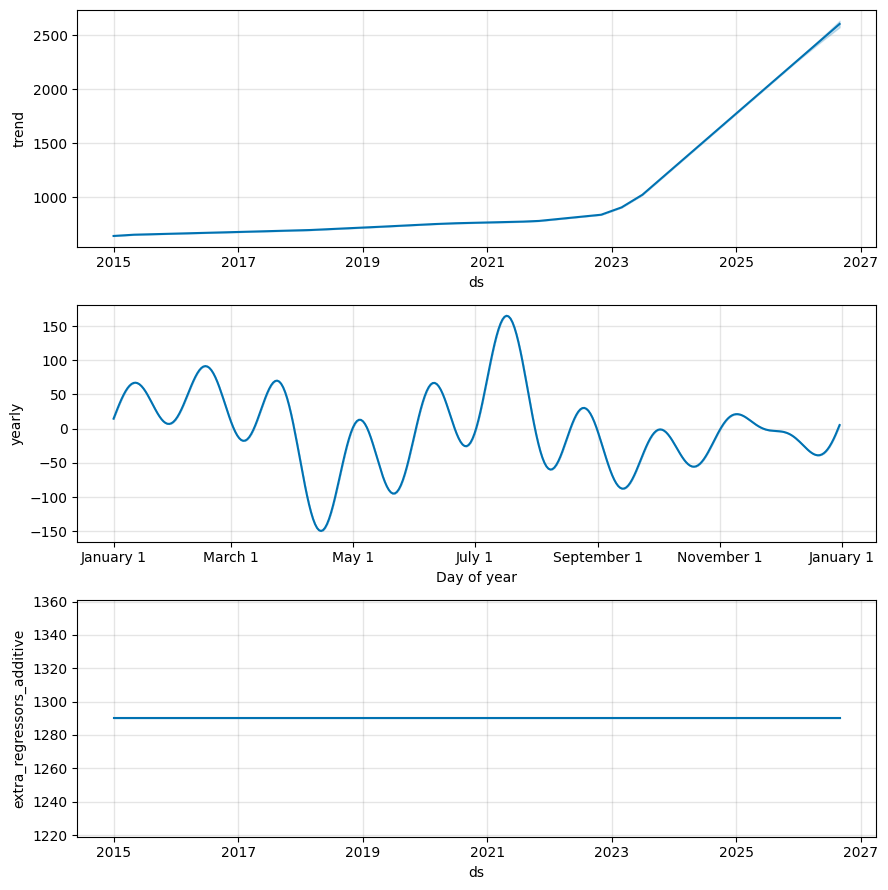

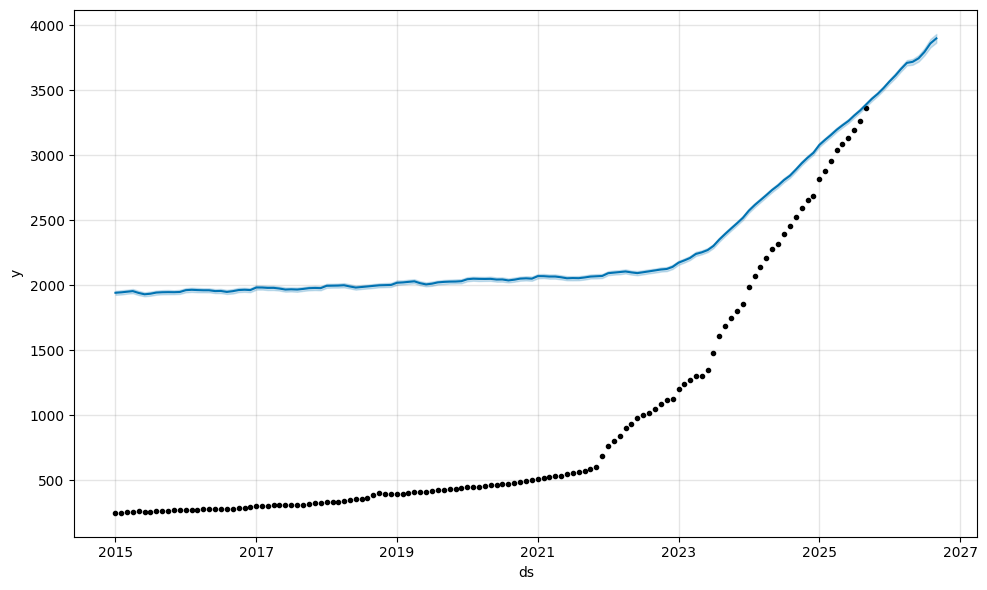

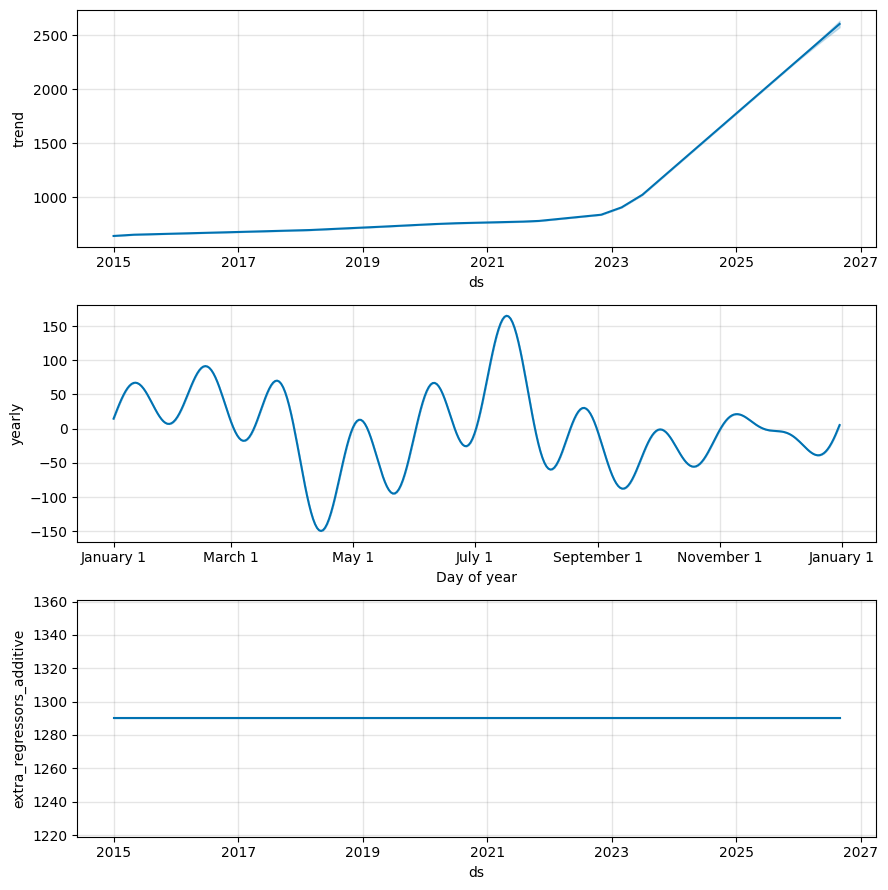

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

data = pd.DataFrame(columns=["ds", "y", "UFE", "Doviz"])

dates = pd.date_range(start='2015-1', end='2025-9', freq='MS')

data["ds"] = dates

tufe = pd.read_excel(r".\tufe.xls")

tufe.drop(inplace=True, index=[0, 1, 2], columns=['Tüketici fiyat endeks rakamları (2003=100)'])

tufe = tufe.loc[13:23]

tufe_2d = pd.DataFrame(tufe.values.reshape(-1, 1)).dropna()
data['y'] = tufe_2d

ufe = pd.read_excel(r".\ufe.xls")

ufe.drop(inplace=True, columns=["Yurt İçi Üretici Fiyat Endeksi ve Değişim Oranı, 1982-2025 (*)"])

ufe = ufe.loc[39:49]

ufe_2d = pd.DataFrame(ufe.values.reshape(-1, 1)).dropna()
data['UFE'] = ufe_2d

doviz = pd.read_excel(r".\doviz_satis.xlsx")

doviz = doviz['TP DK USD S YTL']

doviz.dropna(inplace=True)

doviz = doviz.iloc[0:131]

data['Doviz'] = doviz

data.dropna()

model = Prophet()

model.add_regressor('UFE')
model.add_regressor('Doviz')

model.fit(data)

future = model.make_future_dataframe(periods=12, freq='ME')
future['UFE'] = data['UFE'].ffill().iloc[-1]
future['Doviz'] = data['Doviz'].ffill().iloc[-1]

forecast = model.predict(future)

model.plot(forecast)

model.plot_components(forecast)